<a href="https://colab.research.google.com/github/Adler-1014/SNU_ML_GROUP2/blob/developSrk/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A0%84%EC%B2%98%EB%A6%AC%EB%B6%80%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
file_path = '/content/drive/MyDrive/머신러닝과제/Train.csv'

In [4]:
df = pd.read_csv(file_path)

# 기본 데이터 분석

In [5]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 결측치 대치

In [10]:
from sklearn.impute import KNNImputer

In [11]:
# KNN으로 Item_weight 대치

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'item_weight' 열의 결측치를 대치하기 위해 3가지 열의 데이터 추출
X = df[['Item_Weight', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Weight_imputed'] = X_imputed[:, 0]

In [12]:
df['Item_Weight_imputed'].describe()

count    8523.000000
mean       12.860689
std         4.317876
min         4.555000
25%         9.300000
50%        12.650000
75%        16.239500
max        21.350000
Name: Item_Weight_imputed, dtype: float64

In [13]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

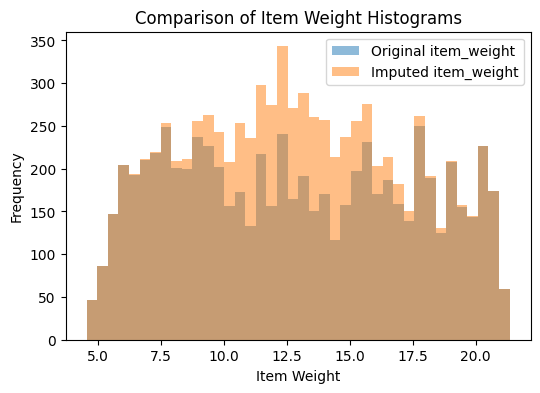

In [14]:
# 히스토그램 겹쳐그리기 비교 / 3개 열 사용
plt.figure(figsize=(6, 4))

# 첫 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight'], bins=40, alpha=0.5, label='Original item_weight')

# 두 번째 열에 대한 히스토그램
plt.hist(df['Item_Weight_imputed'], bins=40, alpha=0.5, label='Imputed item_weight')

# 레이블과 제목 추가
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Comparison of Item Weight Histograms')
plt.legend()

# 그래프 표시
plt.show()

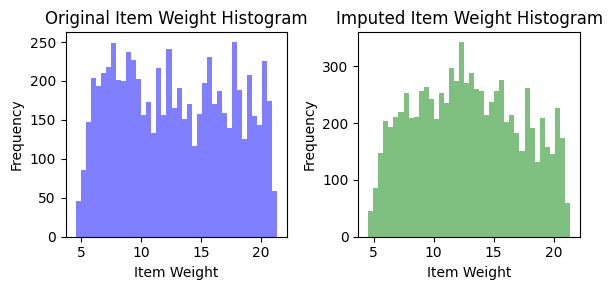

In [15]:
# 플롯 설정
plt.figure(figsize=(6, 3))

# 첫 번째 subplot: 원래 값의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(df['Item_Weight'], bins=40, color='blue', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Original Item Weight Histogram')

# 두 번째 subplot: 대치된 값의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(df['Item_Weight_imputed'], bins=40, color='green', alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Imputed Item Weight Histogram')

# 플롯 보이기
plt.tight_layout()
plt.show()

In [16]:
# 아울렛 식별자 유니크 벨류 확인
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
# 아울렛 아이디 기준 아울렛 사이즈 판별
check_value_counts = df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()
check_value_counts

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

In [18]:
# 어울렛 아이디 기준 아울렛 결측치 확인. out 10, 17, 45가 없음
check_is_null = df.groupby('Outlet_Identifier')['Outlet_Size'].apply(lambda x: x.isnull().sum())
check_is_null

Outlet_Identifier
OUT010    555
OUT013      0
OUT017    926
OUT018      0
OUT019      0
OUT027      0
OUT035      0
OUT045    929
OUT046      0
OUT049      0
Name: Outlet_Size, dtype: int64

In [19]:
check = df.groupby('Outlet_Identifier').agg({
    'Outlet_Size': 'first',
    'Outlet_Establishment_Year': 'first',
    'Outlet_Location_Type': 'first',
    'Outlet_Type': 'first'
})
check

,Outlet_Size,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,
OUT010,None,1998,Tier 3,Grocery Store
OUT013,High,1987,Tier 3,Supermarket Type1
OUT017,None,2007,Tier 2,Supermarket Type1
OUT018,Medium,2009,Tier 3,Supermarket Type2
OUT019,Small,1985,Tier 1,Grocery Store
OUT027,Medium,1985,Tier 3,Supermarket Type3
OUT035,Small,2004,Tier 2,Supermarket Type1
OUT045,None,2002,Tier 2,Supermarket Type1
OUT046,Small,1997,Tier 1,Supermarket Type1


In [20]:
# 판매량 평균을 사이즈 예측에 활용
check_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
check_sales

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [21]:
# out010 은 grocery store 이며 small size. 그로서리 스토어는 일반적으로 작고 판매량도 340내외
# out017 은 supermarket type1 이며 small size. 로케이션 타입이 티어2로 동일하고 아울렛 타입도 슈퍼마켓 1인 다른 데이터와 유사하다고 가정
# out045 은 supermarket type1 이며 small size. 로케이션 타입이 티어2로 동일하고 아울렛 타입도 슈퍼마켓 1인 다른 데이터와 유사하다고 가정

In [22]:
# 전부 small로 대치
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_imputed             0
dtype: int64

In [24]:
# imputed만 쓸거니까 아이템 웨이트 컬럼은 삭제
df = df.drop(columns='Item_Weight')

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_imputed          0
dtype: int64

In [26]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


# 기타 전처리

In [27]:
# 저지방 식품 컬럼 정리
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [28]:
# 모델 훈련 방해 안되게 설립년도 줄이기
df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [29]:
# 제품코드 라벨링 하기
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [30]:
# 저지방 제품 태그 없애기
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [31]:
# Item_visibility가 0인 경우 knn으로 대치

# 0 값을 결측치로 처리
df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 대치할 열들 선택 및 추출
X = df[['Item_Weight_imputed', 'Item_MRP', 'Item_Visibility']]

# KNN 알고리즘을 사용하여 결측치 대치
X_imputed = imputer.fit_transform(X)

# 대치된 값으로 DataFrame 업데이트, 차원 맞추기
df['Item_Visibility_imputed'] = X_imputed[:, 2]

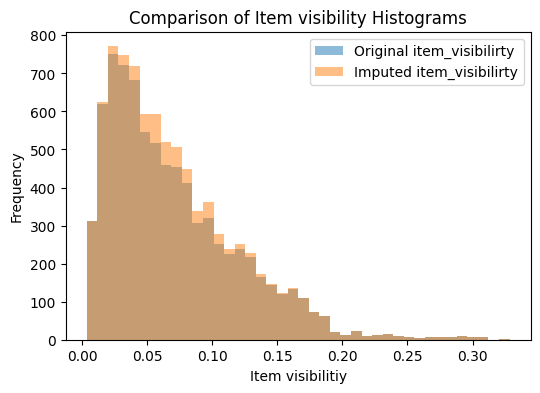

In [32]:
# 히스토그램 겹쳐그리기 비교 / 3개 열 사용
plt.figure(figsize=(6, 4))

# 첫 번째 열에 대한 히스토그램
plt.hist(df['Item_Visibility'], bins=40, alpha=0.5, label='Original item_visibilirty')

# 두 번째 열에 대한 히스토그램
plt.hist(df['Item_Visibility_imputed'], bins=40, alpha=0.5, label='Imputed item_visibilirty')

# 레이블과 제목 추가
plt.xlabel('Item visibilitiy')
plt.ylabel('Frequency')
plt.title('Comparison of Item visibility Histograms')
plt.legend()

# 그래프 표시
plt.show()

In [33]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed,Outlet_Years,New_Item_Type,Item_Visibility_imputed
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,24,Food,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,14,Drinks,0.019278
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,24,Food,0.016760
3,FDX07,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,25,Food,0.047581
4,NCD19,Non-Edible,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,36,Non-Consumable,0.070290


# one-hot-encoding

In [34]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_imputed,Outlet_Years,Item_Visibility_imputed,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,9.30,24,0.016047,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,5.92,14,0.019278,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,2097.2700,17.50,24,0.016760,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,NaN,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,19.20,25,0.047581,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,NaN,Household,53.8614,OUT013,1987,994.7052,8.93,36,0.070290,...,False,False,True,False,True,False,False,False,False,True


# 인풋 나누기

In [35]:
# X 변수 정리(필요없는 컬럼 제거, y 설정)
X = df.drop(columns=['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# 모델 트레이닝

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)

    # predict the training set
    pred = model.predict(X)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

# 파이캐릿 쓰기

In [ ]:
!pip install pycaret

In [38]:
train = df.sample(frac=0.80, random_state=786) # 트레인 데이터 스플릿, 랜덤스테이트: 786
test = df.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [39]:
train = df
train.reset_index(inplace=True, drop=True)

In [48]:
from pycaret.regression import *
# 파이캐릿 리그레션으로 셋업 설정 정하기. data=트레인, target=목표값. 세션아이디 = 786
# 클래스피케이션 등 파이케릿 타깃 유형 변경 필요시 : pycaret.classification

exp_clf = setup(data=train, target='Item_Outlet_Sales', session_id=786, preprocess=True)

,Description,Value
0,Session id,786
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 26)"
4,Transformed data shape,"(8523, 50)"
5,Transformed train set shape,"(5966, 50)"
6,Transformed test set shape,"(2557, 50)"
7,Numeric features,6
8,Categorical features,3
9,Rows with missing values,6.2%


In [47]:
# 자동 전처리 없음
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,782.4779,1251275.7873,1117.8714,0.5725,0.5604,0.5783,0.9080
dummy,Dummy Regressor,1358.2164,2939339.4500,1713.5061,-0.0020,1.0915,2.2303,0.0220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=786)

In [49]:
# 자동 전처리 있음
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,869.3392,1557413.6768,1246.6419,0.4684,0.6109,0.6284,1.0640
lightgbm,Light Gradient Boosting Machine,870.8806,1580320.5764,1255.9252,0.4604,0.5976,0.6212,0.4970
rf,Random Forest Regressor,883.6767,1609728.0400,1267.3508,0.4509,0.5975,0.6134,3.1240
et,Extra Trees Regressor,893.4876,1644577.0486,1280.9164,0.4386,0.6035,0.6178,2.5640
lr,Linear Regression,945.0503,1648548.6193,1282.9427,0.4373,0.7698,1.0579,0.1760
ridge,Ridge Regression,945.0717,1649214.3862,1283.1978,0.4371,0.7690,1.0566,0.3050
lasso,Lasso Regression,945.4412,1651739.6055,1284.1771,0.4362,0.7675,1.0543,0.2040
llar,Lasso Least Angle Regression,945.7084,1653008.8892,1284.6341,0.4358,0.7648,1.0538,0.1010
br,Bayesian Ridge,946.1217,1654157.8783,1285.1200,0.4354,0.7663,1.0541,0.1060
xgboost,Extreme Gradient Boosting,915.4469,1736402.6625,1316.6857,0.4074,0.6657,0.6482,0.2710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=786)

In [50]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,805.0067,1313044.6695,1145.8816,0.5156,0.6165,0.6354
1,862.3478,1504922.5056,1226.7528,0.4506,0.5904,0.6116
2,901.1840,1689269.6636,1299.7191,0.4035,0.6004,0.6340
3,953.9533,1772600.1425,1331.3903,0.4316,0.6182,0.6592
4,843.9025,1514387.2041,1230.6044,0.4265,0.6005,0.6232
5,853.5101,1543734.4364,1242.4711,0.4554,0.6020,0.6422
6,881.4567,1481596.4137,1217.2085,0.5184,0.6374,0.5800
7,856.8527,1543059.2325,1242.1994,0.5020,0.6505,0.6514
8,904.5628,1789854.3384,1337.8544,0.4445,0.6068,0.6320


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
tune_model(estimator = gbr, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:01:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,781.7158,1181532.0735,1086.9830,0.5641,0.5945,0.6408
1,838.8557,1404864.7764,1185.2699,0.4872,0.5879,0.6215
2,847.7018,1454408.9203,1205.9888,0.4865,0.6140,0.6516
3,922.9335,1607420.1276,1267.8407,0.4846,0.6348,0.6749
4,796.0476,1304538.1717,1142.1638,0.5059,0.5898,0.6195
5,795.9314,1330106.8167,1153.3026,0.5308,0.6045,0.6508
6,841.6777,1386345.7411,1177.4318,0.5493,0.5773,0.5975
7,844.8012,1433841.0753,1197.4310,0.5372,0.6358,0.6801
8,852.4774,1474776.7695,1214.4039,0.5423,0.6206,0.6196


GradientBoostingRegressor(max_depth=5, max_features='log2',
                          min_impurity_decrease=0.05, min_samples_split=7,
                          n_estimators=50, random_state=786, subsample=0.85)

In [52]:
rf = create_model('rf') #rf 랜덤포레스트 객체 생성

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,815.4627,1365526.0979,1168.5573,0.4963,0.5903,0.6119
1,861.2827,1507123.5295,1227.6496,0.4498,0.5947,0.6076
2,894.3829,1657336.5254,1287.3758,0.4148,0.5941,0.6150
3,995.0518,1941027.2900,1393.2076,0.3776,0.6265,0.6599
4,864.3922,1573135.7730,1254.2471,0.4042,0.6017,0.5994
5,863.5761,1580995.6682,1257.3765,0.4423,0.5952,0.6225
6,904.1692,1596094.0650,1263.3662,0.4812,0.5782,0.5792
7,869.4134,1598336.8305,1264.2535,0.4841,0.6109,0.6492
8,923.0896,1794064.4677,1339.4269,0.4432,0.6031,0.6036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tune_model(estimator = rf, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:04:22
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
blend_best2 = blend_models(estimator_list=[gbr, rf], fold=5, optimize='R2') # 모델 블랜딩 진행

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,855.7983,1505722.6768,1227.0789,0.4482,0.5990,0.6271
1,930.9296,1766485.8321,1329.0921,0.4074,0.6108,0.6463
2,877.2683,1657855.9268,1287.5775,0.3960,0.6101,0.6319
3,872.0924,1552914.3210,1246.1598,0.4966,0.5895,0.6110
4,876.6568,1629982.6171,1276.7077,0.4815,0.5950,0.6086
Mean,882.5491,1622592.2748,1273.3232,0.4459,0.6009,0.6250
Std,25.4096,90018.9073,35.2170,0.0395,0.0084,0.0139


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [55]:
tune_model(estimator = blend_best2, optimize='R2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:10:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Voting Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,802.4223,1309804.8711,1144.4671,0.5168,0.5950,0.6240
1,856.9243,1486442.8009,1219.1976,0.4574,0.5851,0.6050
2,893.0396,1660965.3788,1288.7845,0.4135,0.5947,0.6240
3,962.1130,1802116.4479,1342.4293,0.4221,0.6170,0.6551
4,843.7849,1510744.7996,1229.1236,0.4278,0.5963,0.6121
5,851.6619,1535778.7436,1239.2654,0.4582,0.5952,0.6328
6,884.3045,1494809.8454,1222.6242,0.5141,0.5747,0.5708
7,853.7305,1542971.6483,1242.1641,0.5020,0.6112,0.6459
8,903.4583,1764573.6267,1328.3725,0.4523,0.5996,0.6159


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=786)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=786))],
                n_jobs=-1, weights=[0.73, 0.31])